In [1]:
#Initialising all pre-requisite libraries 
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [ ]:
#Initialising data
data = pd.read_excel('https://raw.githubusercontent.com/Aturoh/Investment-Simulation-TBill-vs-USD/main/data/Naira_valuation_from_2001_to_present.csv')

In [3]:
#Isolating only the USD 
usd = data[data['Currency'] == 'US DOLLAR']

In [4]:
#converting the 'Date' column to datetime format
usd['Date'] = pd.to_datetime(usd['Date'], dayfirst = False)

C:\Users\user\AppData\Local\Temp\ipykernel_20828\1000085238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usd['Date'] = pd.to_datetime(usd['Date'], dayfirst = False)


In [5]:
#selecting the timeline between 2020 and 2025
usd_recent = usd[usd['Date'].dt.year.between(2020, 2025)]

In [6]:
#data testing and validation
usd_recent

,Currency,Date,Buying Rate,Central Rate,Selling Rate
9,US DOLLAR,2025-07-04,1527.5616,1528.0616,1528.5616
21,US DOLLAR,2025-07-03,1524.8246,1525.3246,1525.8246
32,US DOLLAR,2025-07-02,1525.1577,1525.6577,1526.1577
44,US DOLLAR,2025-07-01,1528.5795,1529.0795,1529.5795
56,US DOLLAR,2025-06-30,1528.7105,1529.2105,1529.7105
...,...,...,...,...,...
15984,US DOLLAR,2020-01-08,305.9500,306.4500,306.9500
15996,US DOLLAR,2020-01-07,306.0000,306.5000,307.0000
16008,US DOLLAR,2020-01-06,306.0000,306.5000,307.0000
16020,US DOLLAR,2020-01-03,306.0000,306.5000,307.0000


In [7]:
for year in range(2020, 2026):
    globals()[f'dollar_{year}'] = usd_recent[usd_recent['Date'].dt.year == year]
    globals()[f'dollar_averaged_{year}'] = globals()[f'dollar_{year}'].groupby(globals()[f'dollar_{year}']['Date'].dt.month)['Central Rate'].mean().reset_index()
    globals()[f'dollar_averaged_{year}']['month'] = globals()[f'dollar_averaged_{year}']['Date'].map(lambda x : calendar.month_name[x])
    globals()[f'dollar_averaged_{year}']['year'] = year


In [8]:
#data testing and validation
dollar_averaged_2021

,Date,Central Rate,month,year
0,1,379.500000,January,2021
1,2,379.500000,February,2021
2,3,379.500000,March,2021
3,4,379.500000,April,2021
4,5,397.145833,May,2021
5,6,409.664762,June,2021
6,7,409.632632,July,2021
7,8,409.653182,August,2021
8,9,410.016818,September,2021
9,10,410.412632,October,2021


In [9]:
#appending all the individual year
processed_currency = pd.concat([dollar_averaged_2020, dollar_averaged_2021, dollar_averaged_2022, dollar_averaged_2023, dollar_averaged_2024, dollar_averaged_2025])

In [10]:
processed_currency

,Date,Central Rate,month,year
0,1,306.459524,January,2020
1,2,306.455000,February,2020
2,3,327.061905,March,2020
3,4,360.500000,April,2020
4,5,360.500000,May,2020
...,...,...,...,...
2,3,1525.869300,March,2025
3,4,1594.551474,April,2025
4,5,1594.704714,May,2025
5,6,1549.294311,June,2025


In [11]:
processed_currency['date'] = pd.to_datetime( processed_currency['year'].astype(str) + ' ' + processed_currency['month'])

C:\Users\user\AppData\Local\Temp\ipykernel_20828\2183938119.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  processed_currency['date'] = pd.to_datetime( processed_currency['year'].astype(str) + ' ' + processed_currency['month'])


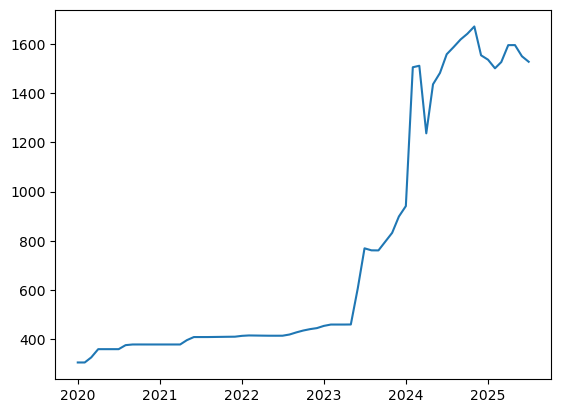

In [12]:
#A visual representation of the processed data
plt.plot( processed_currency['date'], processed_currency['Central Rate'])

In [13]:
#Calculating the percentage change in the value NGN/USD over the processed period
for interest in range(2020, 2025):
    processed_currency['%change'] = ((processed_currency['Central Rate'] -  processed_currency['Central Rate'].iloc[0])/processed_currency['Central Rate'].iloc[0])*100

In [14]:
#creating a column to calculate the return on an N100,000 over the observed period
for interest in range(2020, 2025):
    processed_currency['Total'] = (100000/processed_currency['Central Rate'].iloc[0])*processed_currency['Central Rate']

In [15]:
#data testing and validation
processed_currency

,Date,Central Rate,month,year,date,%change,Total
0,1,306.459524,January,2020,2020-01-01,0.000000,100000.000000
1,2,306.455000,February,2020,2020-02-01,-0.001476,99998.523848
2,3,327.061905,March,2020,2020-03-01,6.722709,106722.708662
3,4,360.500000,April,2020,2020-04-01,17.633805,117633.805443
4,5,360.500000,May,2020,2020-05-01,17.633805,117633.805443
...,...,...,...,...,...,...,...
2,3,1525.869300,March,2025,2025-03-01,397.902392,497902.392144
3,4,1594.551474,April,2025,2025-04-01,420.313891,520313.891330
4,5,1594.704714,May,2025,2025-05-01,420.363895,520363.894867
5,6,1549.294311,June,2025,2025-06-01,405.546146,505546.145818


In [16]:
ap = processed_currency[["Total", "year"]].iloc[:-1]
ap["year"].astype(str)
ap

,Total,year
0,100000.000000,2020
1,99998.523848,2020
2,106722.708662,2020
3,117633.805443,2020
4,117633.805443,2020
...,...,...
1,489614.929028,2025
2,497902.392144,2025
3,520313.891330,2025
4,520363.894867,2025


In [17]:
#final data export
#ap.to_csv('Naira_rate8.csv', index = False)

,Total,year
0,100000.000000,2020
1,99998.523848,2020
2,106722.708662,2020
3,117633.805443,2020
4,117633.805443,2020
...,...,...
1,489614.929028,2025
2,497902.392144,2025
3,520313.891330,2025
4,520363.894867,2025
